In [1]:
library(Matrix)

In [2]:
read_Matrix<-function(dna){
       path="PATH-TO-MATRIX-DIRECTORY"
       dna.mm<-readMM(paste0(path,"/",dna,"_mm10_sorted_rmdup_mtx2/matrix.mtx"))
   }

In [3]:
read_Matrix<-function(dna){
       path="PATH-TO-MATRIX-DIRECTORY"
       dna.mm<-readMM(paste0(path,"/",dna,"_mm10_sorted_rmdup_mtx2/matrix.mtx"))
       dna.bc<-read.csv(paste0(path,"/",dna,"_mm10_sorted_rmdup_mtx2/barcodes.tsv"),sep="\t",head=F)
       dna.genes<-read.csv(paste0(path,"/",dna,"_mm10_sorted_rmdup_mtx2/genes.tsv"),sep="@",head=F)
       rownames(dna.mm)<-dna.genes[,1]
       colnames(dna.mm)<-dna.bc[,1]
       return(dna.mm)
   }

In [4]:
plot_bc<-function(dna,rna){
       dna.s<-colSums(dna)
       rna.s<-colSums(rna)
       names(dna.s)<-colnames(dna)
       names(rna.s)<-colnames(rna)
       m<-merge(dna.s, rna.s,by=0)
       plot(m[,2:3], pch=19, cex=0.01, log="xy")
   }

In [5]:
test_cutoff<-function(dna, rna,dna.cutoff,rna.cutoff,main="no main"){
       dna.s<-colSums(dna)
       rna.s<-colSums(rna)
       names(dna.s)<-colnames(dna)
       names(rna.s)<-colnames(rna)
       m<-merge(dna.s, rna.s,by=0)
       #return(m)
        plot(m[,2:3], pch=19, cex=0.01, log="xy",col="grey",main=main)
       f<-m[m[,2]>dna.cutoff & m[,3]>rna.cutoff,]
       points(f[,2:3], pch=19, cex=0.01, col="firebrick")
       legend("bottomright", bty="n", legend=c(paste0("# of cells:", dim(f)[1]), paste0("DNA median #:", median(f[,2])), paste0("RNA median #:", median(f[,3]))))
   }

In [6]:
write_Matrix<-function(dna.prefix, rna.prefix, dna, rna, dna.cutoff, rna.cutoff){
       path="PATH-TO-MATRIX-DIRECTORY"
       dna.s<-colSums(dna)
       rna.s<-colSums(rna)
       names(dna.s)<-colnames(dna)
       names(rna.s)<-colnames(rna)
       m<-merge(dna.s, rna.s,by=0)
       f<-m[m[,2]>dna.cutoff & m[,3]>rna.cutoff,]
       rownames(f)<-f[,1]
       dna.f<-dna[,rownames(f)]
       rna.f<-rna[,rownames(f)]
       system(paste0("mkdir ", path, "/", dna.prefix,"_filtered_matrix"))
       system(paste0("mkdir ", path, "/", rna.prefix,"_filtered_matrix"))
       writeMM(dna.f, paste0(path, "/", dna.prefix,"_filtered_matrix/matrix.mtx"))
       writeMM(rna.f, paste0(path, "/", rna.prefix,"_filtered_matrix/matrix.mtx"))
       write.table(colnames(dna.f), sep="\t", quote=F, col.names=F, row.names=F, file=paste0(path, "/", dna.prefix,"_filtered_matrix/barcodes.tsv"))
       write.table(rownames(dna.f), sep="\t", quote=F, col.names=F, row.names=F, file=paste0(path, "/", dna.prefix,"_filtered_matrix/genes.tsv"))       
       write.table(colnames(rna.f), sep="\t", quote=F, col.names=F, row.names=F, file=paste0(path, "/", rna.prefix,"_filtered_matrix/barcodes.tsv"))
       write.table(rownames(rna.f), sep="\t", quote=F, col.names=F, row.names=F, file=paste0(path, "/", rna.prefix,"_filtered_matrix/genes.tsv"))   
   }

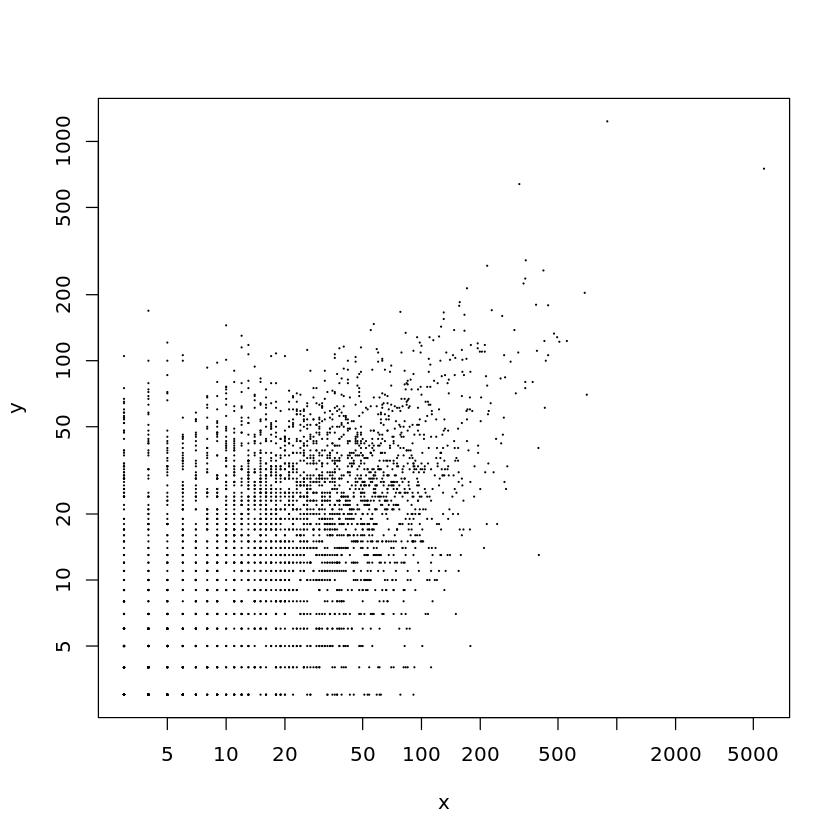

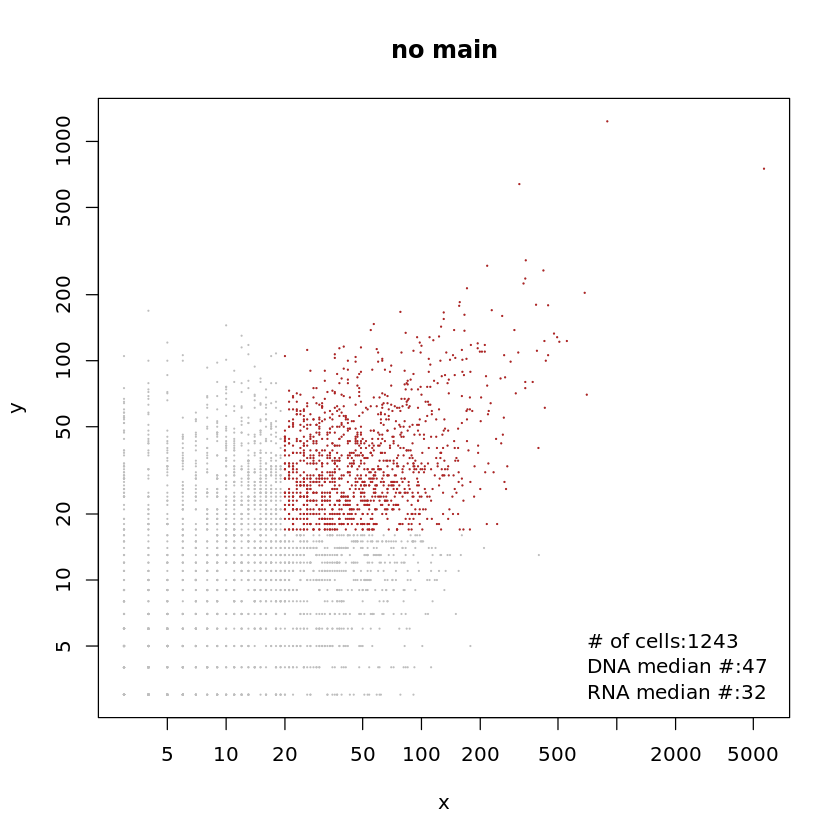

In [7]:
#EXAMPLE:
dna<-read_Matrix("NA199")
rna<-read_Matrix("NA214")
plot_bc(dna,rna)
test_cutoff(dna,rna,19,16)

In [8]:
write_Matrix("NA199","NA214",dna,rna,19,16)